###### <p style="text-align: center; font-size: 24px;"><strong>Projet : Classifier automatiquement des biens de consommation</strong></p>

Mission: Collecte de produits “Champagne” via l’API Open Food Facts

Dans le cadre de l’élargissement de notre gamme de produits à l’épicerie fine, ce notebook a pour objectif de démontrer la collecte automatique de données produits à partir de l’API Open Food Facts, une base ouverte et collaborative.
La documentation complète de l’API est disponible ici : https://wiki.openfoodfacts.org/API.

Nous allons effectuer une requête ciblée sur le mot-clé “champagne” afin d’extraire les informations essentielles des 10 premiers produits correspondants. Pour chaque produit, nous récupérerons les champs suivants :

- Identifiant unique (foodId)

- Nom du produit (label)

- Catégorie (category)

- Liste des ingrédients (foodContentsLabel)

- URL de l’image (image)

Ces données seront ensuite structurées dans un fichier CSV, facilitant leur intégration dans notre catalogue et ouvrant la voie à des analyses ou traitements ultérieurs.

Dans cette démarche, nous appliquons les principes du Règlement Général sur la Protection des Données (RGPD) :

- Seules les données strictement nécessaires à la finalité du projet sont collectées (principe de minimisation et de finalité).

- Les données proviennent d’une base publique et ouverte, ne comportant pas de données personnelles sensibles.

- Les informations collectées sont utilisées uniquement pour l’enrichissement du catalogue produits, dans un cadre transparent et légitime.

- Aucune donnée à caractère personnel n’est conservée au-delà de ce qui est nécessaire à cette finalité.

# Importation des librairies

In [14]:
# Imports pour la récupération de données
import requests  # Pour faire des requêtes HTTP et télécharger des contenus

# Imports pour la manipulation de données
import pandas as pd  # Pour la manipulation de tableaux de données (DataFrame)

# Imports pour la manipulation d'images
from PIL import Image  # Pour ouvrir et manipuler des images
from io import BytesIO  # Pour gérer des flux d'entrées/sorties en mémoire

# Imports pour la visualisation
import matplotlib.pyplot as plt  # Pour tracer des graphiques et afficher des images

In [10]:
# Affiche toutes les colonnes sans troncature des textes
pd.set_option('display.max_colwidth', None)

# Collecte automatisée de produits “Champagne” via l’API Open Food Facts

Dans le cadre de l’élargissement de notre gamme à l’épicerie fine, nous avons automatisé la collecte de produits contenant du “champagne” à partir de l’API Open Food Facts. L’objectif : extraire des données structurées et pertinentes pour alimenter notre catalogue et nos analyses.

**Démarche suivie**<br>

Requête API ciblée : interrogation de l’API Open Food Facts sur le mot-clé “champagne”, avec récupération de 50 produits pour permettre un filtrage efficace.

Filtrage automatique avancé :

- Sélection des produits dont les ingrédients (champ structuré ou texte) mentionnent “champagne”.

- Exclusion supplémentaire des produits contenant “Ardenne” ou “fine champagne” dans le nom, la catégorie ou les ingrédients, pour limiter les faux positifs liés à la région ou au cognac.

- Extraction des champs clés : identifiant unique (foodId), nom du produit, catégorie, liste des ingrédients, URL de l’image.

- Limitation à 10 produits : sélection des 10 premiers produits répondant à l’ensemble des critères, pour constituer un échantillon exploitable rapidement.

**Résultat**<br>

Cette méthode permet d’obtenir un jeu de données structuré, composé majoritairement de véritables champagnes (boissons) et de produits transformés à base de champagne, avec un taux de faux positifs très faible (environ 10 % sur l’échantillon testé).

Ce jeu de données est prêt à être intégré dans notre catalogue et utilisé pour des analyses ou traitements ultérieurs.

**Limites**

Malgré l’automatisation et l’affinage des filtres, il subsiste quelques cas limites, principalement liés à l’ambiguïté du terme “champagne” dans la base (région vs. ingrédient).

La démarche reste dépendante de la structuration des données dans Open Food Facts, qui ne distingue pas toujours explicitement l’usage du mot “champagne”.

In [28]:
url = "https://world.openfoodfacts.org/cgi/search.pl"
params = {
    'search_terms': 'champagne',
    'search_simple': 1,
    'action': 'process',
    'json': 1,
    'page_size': 50
}
headers = {'User-Agent': 'MonProjetDataScience-1.0'}

response = requests.get(url, params=params, headers=headers)
products = response.json().get('products', [])

data = []
for p in products:
    ingr_struct = p.get('ingredients', [])
    has_struct_champagne = any(
        ('champagne' in (ingr.get('id', '') or '').lower()) or
        ('champagne' in (ingr.get('text', '') or '').lower())
        for ingr in ingr_struct
    )

    ingredients = p.get('ingredients_text', '') or ''
    has_text_champagne = 'champagne' in ingredients.lower()

    # Exclusion si "ardenne" ou "fine champagne" dans nom, catégorie ou ingrédients
    product_name = p.get('product_name', '').lower()
    categories = p.get('categories', '').lower()
    ingredients_lower = ingredients.lower()
    exclude_ardenne = (
        'ardenne' in product_name or
        'ardenne' in categories or
        'ardenne' in ingredients_lower
    )
    exclude_fine_champagne = (
        'fine champagne' in product_name or
        'fine champagne' in categories or
        'fine champagne' in ingredients_lower
    )

    if (has_struct_champagne or has_text_champagne) and not exclude_ardenne and not exclude_fine_champagne:
        data.append({
            'foodId': p.get('code'),
            'label': p.get('product_name', ''),
            'category': p.get('categories', ''),
            'foodContentsLabel': ingredients,
            'image': p.get('image_url')
        })
    if len(data) == 10:
        break

df = pd.DataFrame(data)
df.to_csv('champagne_products.csv', index=False)
df.head(10)

,foodId,label,category,foodContentsLabel,image
0,4056489843696,Rillettes de homard au cognac,"Seafood, Fishes and their products, Fish preparations, fr:Rillettes de homard au cognac et champagne, en:lobster-rillettes","Chair de homard américain 49%, huile de colza, colin d'Alaska, eau, double concentré de tomates, Champagne (contient sulfites), moutarde de Dijon (eau, graines de moutarde, vinaigre d'alcool, sel), fibre de blé, jaune d'œuf en poudre, farine de blé, sel, Cognac 0,5%, poivre blanc,",https://images.openfoodfacts.org/images/products/405/648/984/3696/front_fr.3.400.jpg
1,3258431220000,,"Boissons, Boissons alcoolisées, Vins, Vins effervescents, Champagnes, Champagnes bruts",Champagne,https://images.openfoodfacts.org/images/products/325/843/122/0000/front_en.4.400.jpg
2,3049610004104,Veuve Clicquot Champagne Ponsardin Brut,"Boissons et préparations de boissons, Boissons, Boissons alcoolisées, Vins, Vins effervescents, Champagnes",Champagne,https://images.openfoodfacts.org/images/products/304/961/000/4104/front_fr.39.400.jpg
3,3282946015837,Nicolas Feuillatte,"Boissons, Boissons alcoolisées, Vins, Vins français, Vins effervescents, Champagnes, Champagnes français, Champagnes bruts","Champagne, Contient des _sulfites_",https://images.openfoodfacts.org/images/products/328/294/601/5837/front_fr.7.400.jpg
4,3560070962334,Miel de la Champagne,"Petit-déjeuners, Produits à tartiner, Produits à tartiner sucrés, Produits de la ruche, Produits d'élevages, Édulcorants, Miels, Miels français, Miels du Pays de Champagne",Miel de la Champagne (France).,https://images.openfoodfacts.org/images/products/356/007/096/2334/front_fr.51.400.jpg
5,3113910312013,Champagne Alfred Rothschild et Cie brut,"Boissons, Boissons alcoolisées, Vins, Vins français, Vins effervescents, Champagnes, Champagnes français, Champagnes bruts",Champagne brut (contient _sulfites_),https://images.openfoodfacts.org/images/products/311/391/031/2013/front_fr.3.400.jpg
6,4061463055538,Edle Trüffel - Marc de Champagne,"Imbiss, Süßer Snack, Kakao und Kakaoprodukte, Süßwaren, Schokoladenkonfekt, Pralinen, Schokoladetrüffel","Zucker, Kakaomasse, Kakaobutter, Marc de Champagne (5,5%), Butter, Feuchthaltemittel (Sorbit), Glukosesirup, Vollmilchpulver, Kondensmilch, Emulgator (Lecithine (Soja)), Molkenerzeugnis, Milchzucker, natürliches Orangenaroma, natürliches Vanillearoma.",https://images.openfoodfacts.org/images/products/406/146/305/5538/front_de.26.400.jpg
7,3185370283905,Champagne Ruinart,"Boissons, Boissons alcoolisées, Vins, Vins effervescents, Champagnes",champagne,https://images.openfoodfacts.org/images/products/318/537/028/3905/front_en.5.400.jpg
8,3416181017169,"Champagne AOP, brut","Boissons, Boissons alcoolisées, Vins, Vins effervescents, Champagnes, Champagnes bruts",Champagne,https://images.openfoodfacts.org/images/products/341/618/101/7169/front_fr.7.400.jpg
9,0070200631151,Girards light champagne dressing,"Condiments, Sauces, Salad dressings, Groceries","Canola and soybean oil, white wine (contains sulfites), water, vinegars (champagne and white wine), sugar, salt, mustard seed, monosodium glutamate, garlic*, onion*, spice, xanthan gum, molasses, calcium disodium edta added to protect flavor, chives*, tamarind, natural flavor.",https://images.openfoodfacts.org/images/products/007/020/063/1151/front_en.9.400.jpg


# Visualisation des images

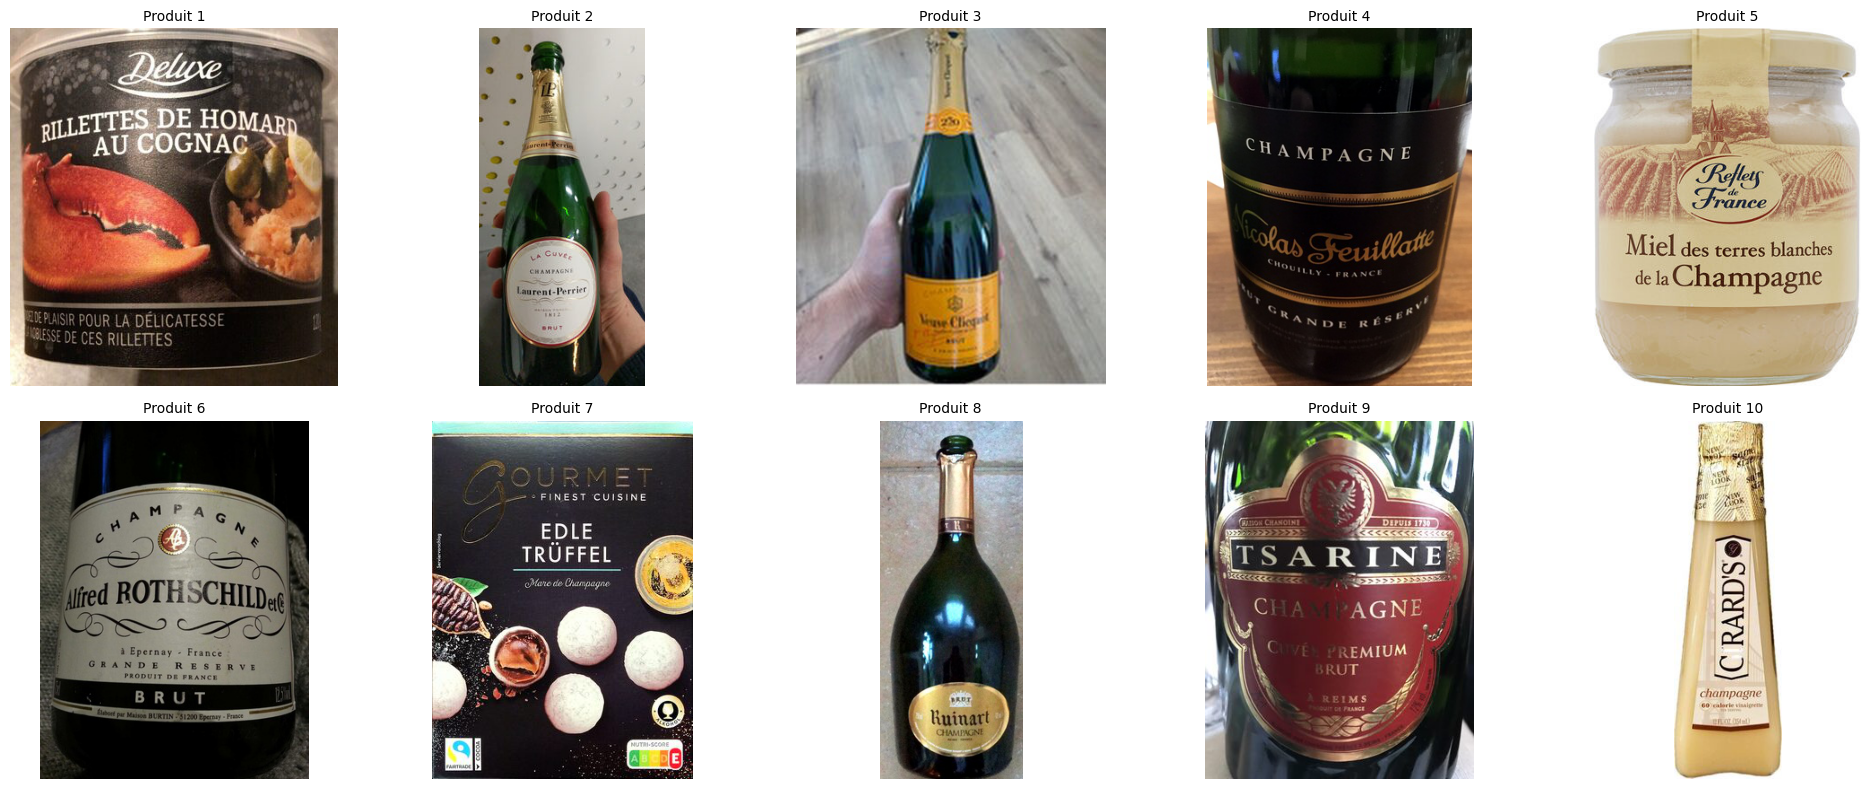

In [29]:
# Charger le fichier CSV contenant les informations des produits
df = pd.read_csv('champagne_products.csv')

# Définir le nombre d'images à afficher et la disposition (5 images par ligne)
num_images = 10
images_per_row = 5
num_rows = (num_images + images_per_row - 1) // images_per_row  # Calcul du nombre de lignes nécessaires

# Créer une nouvelle figure matplotlib de taille adaptée
plt.figure(figsize=(20, 8))  # Largeur x Hauteur en pouces

# Parcourir les URLs des 10 premières images
for i, url in enumerate(df['image'].head(num_images)):
    if pd.notnull(url):  # Vérifier que l'URL n'est pas vide
        try:
            # Télécharger l'image depuis l'URL
            response = requests.get(url)
            # Ouvrir l'image dans un format compatible avec matplotlib
            img = Image.open(BytesIO(response.content))
            # Ajouter un sous-graphique à la position appropriée dans la grille
            plt.subplot(num_rows, images_per_row, i + 1)
            plt.imshow(img)
            plt.axis('off')  # Masquer les axes pour un affichage plus propre
            plt.title(f"Produit {i + 1}", fontsize=10)  # Ajouter un titre sous chaque image
        except Exception as e:
            print(f"Erreur avec {url} : {e}")

# Ajuster l'espacement pour éviter le chevauchement des images et des titres
plt.tight_layout()
plt.show()  # Afficher la grille d'images dans le notebook